# Questão 1: Perceptron de Rosenblatt

## Problema

A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao
transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de
cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1 e mínimo de -0.1. 

## Objetivo

 Formular este problema como um problema de classificação de 8 padrões e treinar uma rede Perceptron de
Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador. 

Para esta solução será utilizado o [conjunto de treinamento]("./input_x.txt")
e o conjunto de validação "output_y.txt".

## Metodologia  
Almeja-se implementar uma rede neural baseada no Perceptron de Rosenblatt, o qual está ilustrado na Figura abaixo. 

  <p align="center">
    <img src="img/perceptron.jpg">
  </p>
  
 Dessa forma a rede será dividida nos seguintes módulos:
 - Definição do bias;
 - Inicialização dos pesos das conexões;
 - Função de Ativação;
 - Saída do neurônio;
 - Backpropagation

## Import das bibliotecas

In [1]:
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Funções de Ativação

Nesta Seção são implementadas 4 tipos de funções de ativação, seus intervalos de classificação podem ser vistos nas Figuras abaixos;

In [2]:
def activation_function(name, xW):
    if name == 'sigmoid': #Sigmoide: [0,1]
        return 1.0/(1.0 + np.exp(-xW))
    
    elif name == 'tangH': #Tangente Hiperbólica: [-1, 1]
        return ((1.0 - np.exp(-xW)) / (1.0 + np.exp(-xW)))
    
    elif name == 'relu': #ReLU: (0) ou (x) -- Evita o desaparecimento do gradiente
        return np.where(xW<=0,0,xW)
    
    elif name == 'step': #STEP: (-1) ou (1)
        return np.where(xW<=0,-1,1)

Sigmóide: apresenta valores entre 0 e 1


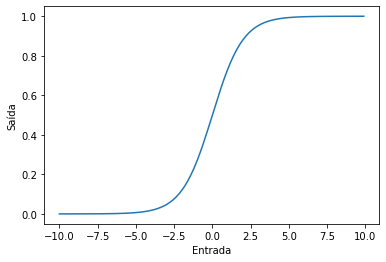


Tangente Hiperbólica: apresenta valores entre -1 e 1


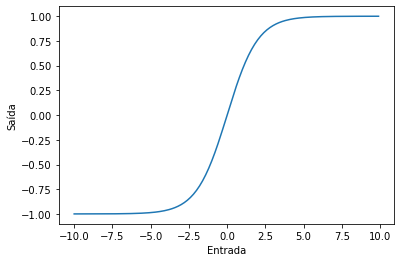


ReLU: apresenta a entrada positiva ou 0 em caso de ser negativa


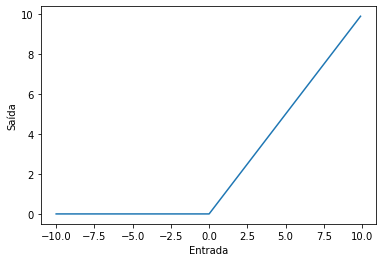


Step: Possui como saída 0 ou 1


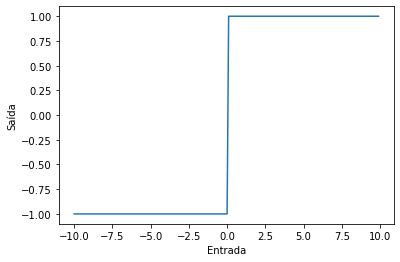

In [3]:
data_plot = np.arange(-10., 10., 0.1)
def viewActivFunc(data_plot, func_type):
    func = []
    for i in range(len(data_plot)):
        func.append(activation_function(func_type, data_plot[i]))

    plt.plot(data_plot,func)
    plt.xlabel('Entrada')
    plt.ylabel('Saída')
    plt.show()
    
print("Sigmóide: apresenta valores entre 0 e 1")
viewActivFunc(data_plot, 'sigmoid')
    
print("\nTangente Hiperbólica: apresenta valores entre -1 e 1")
viewActivFunc(data_plot, 'tangH')

print("\nReLU: apresenta a entrada positiva ou 0 em caso de ser negativa")
viewActivFunc(data_plot, 'relu')

print("\nStep: Possui como saída 0 ou 1")
viewActivFunc(data_plot, 'step')

## Camada

A classe Layer é inicializada com a dimensão dos dados de entrada, número de neurônios e o tipo da função de ativação a ser utilizada. Seus parâmetros são classificados em:    

▶ Dados de entrada: **input**   
▶ Matriz (neuronios X dim. da entrada) com o peso de todos os neurônios: **weight**    
▶ Vetor com dados do bias de todos os neurônios: **bias**   
▶ O tipo da função de ativação a ser utilizada: **activation**  
▶ A matriz de saída da camada: **_out_layer**  





In [4]:
class Layer():
    def __init__(self, input_dim, neuron_num=1, activation=step):
        self.input = None
        self.weight = np.random.randn(neuron_num, input_dim)
        self.bias = np.random.randn(1, neuron_num)
        self.activation = activation
        self._out_layer = None

NameError: name 'step' is not defined

## Rede Neural 

▶ **x** = matriz que corresponde ao dado de entrada;  
▶ **W** = pesos da rede que são aprendidos durante o treinamento;  
▶ **y** = vetor que corresponde ao rótulo da entrada.  